Name: Dhyan Navneeth V
Roll No: 25
Dept: ECE


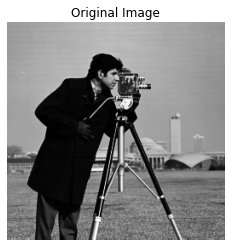

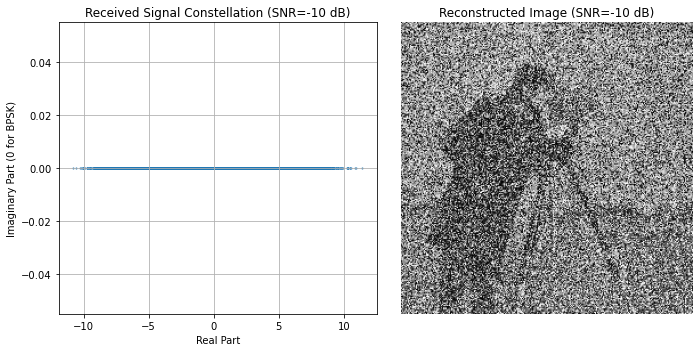

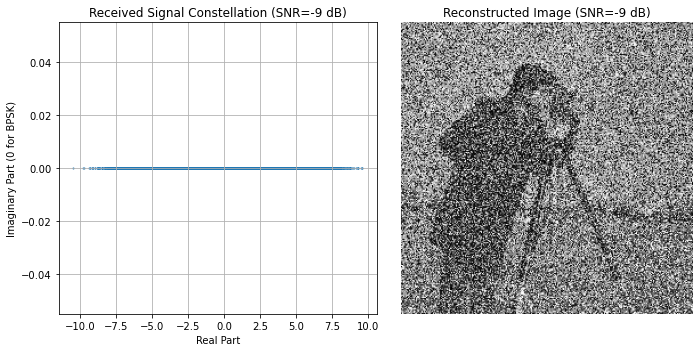

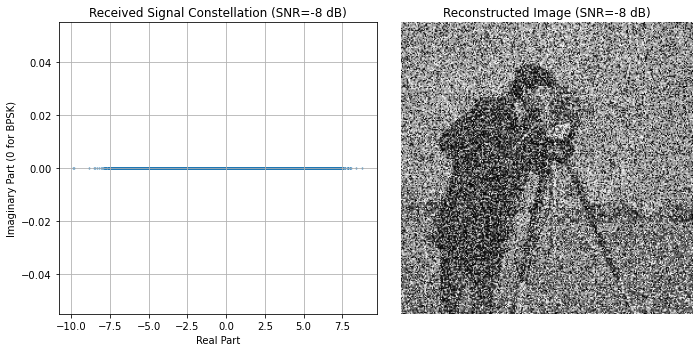

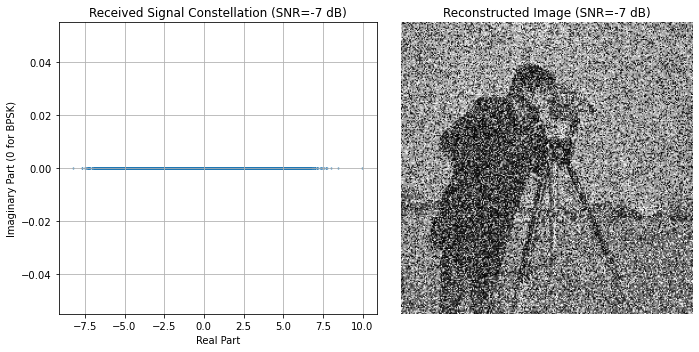

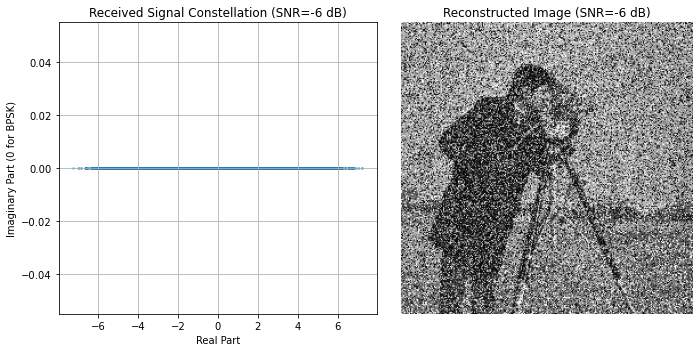

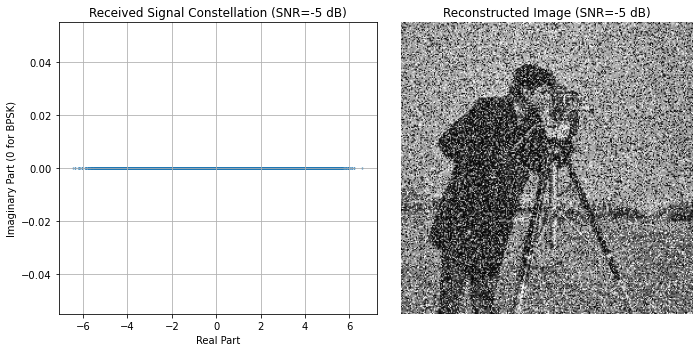

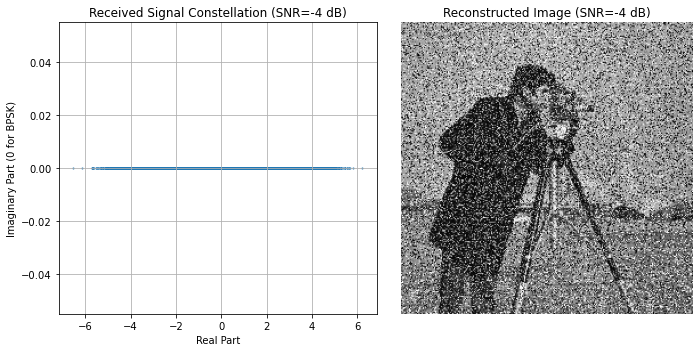

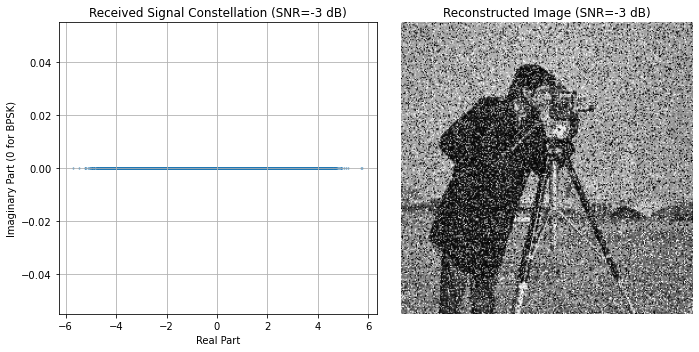

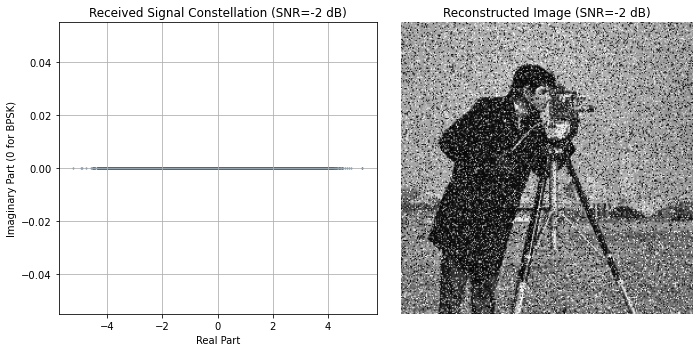

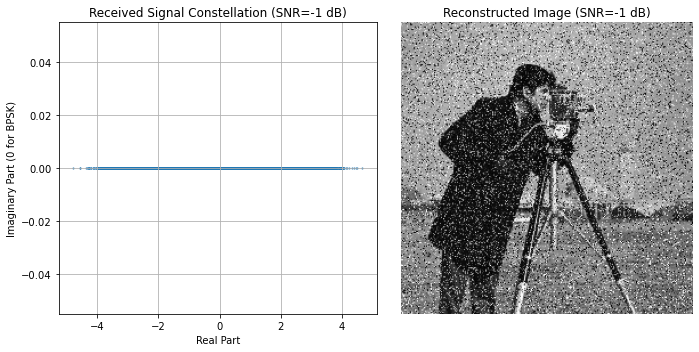

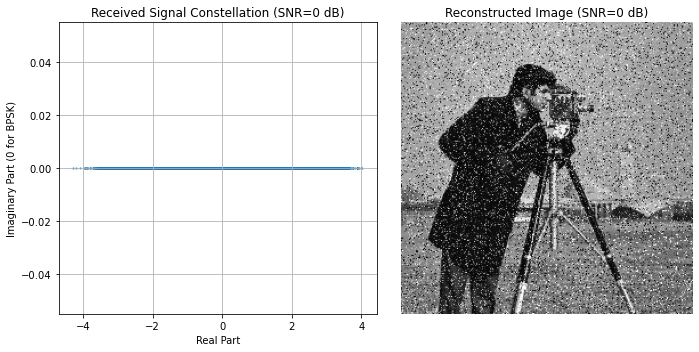

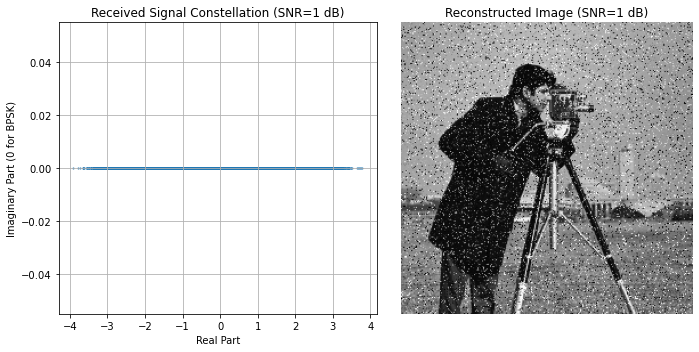

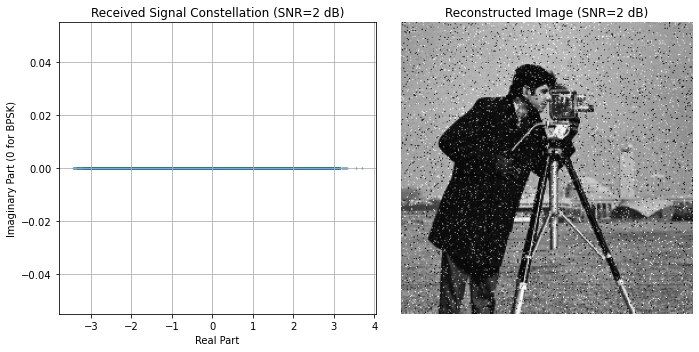

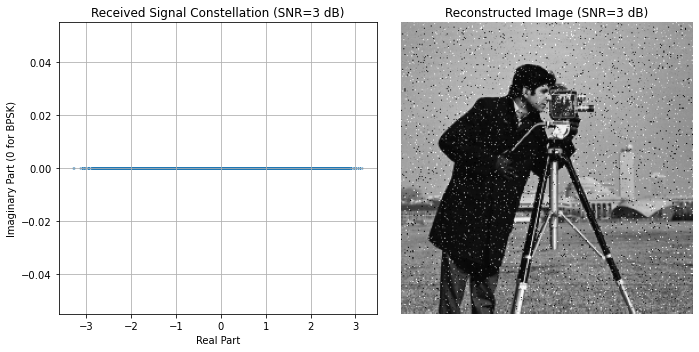

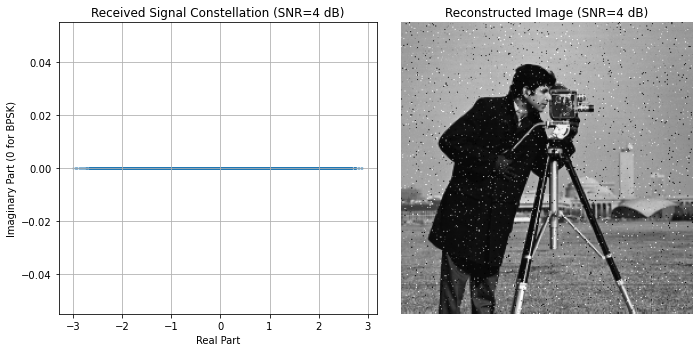

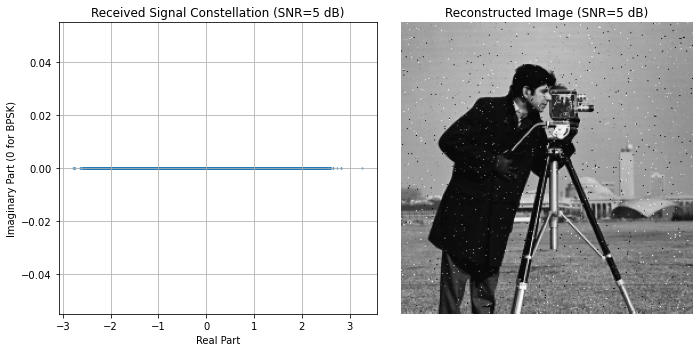

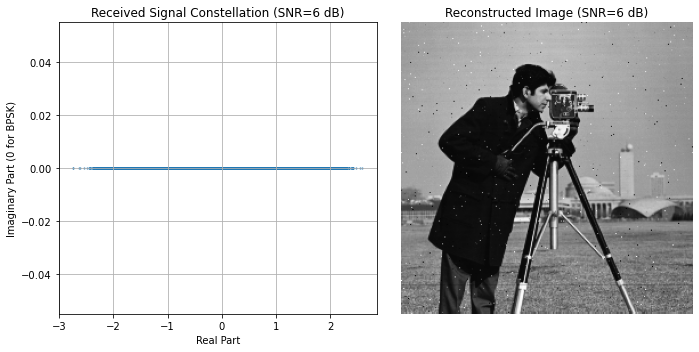

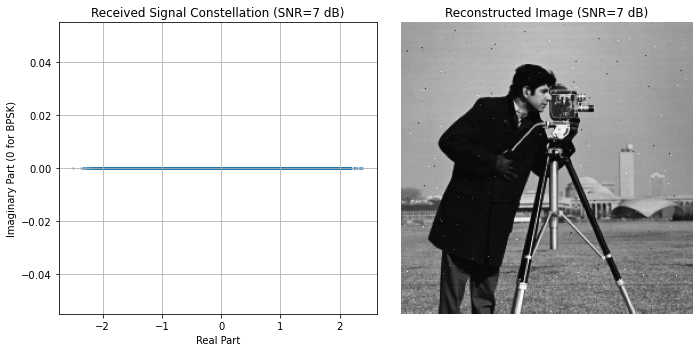

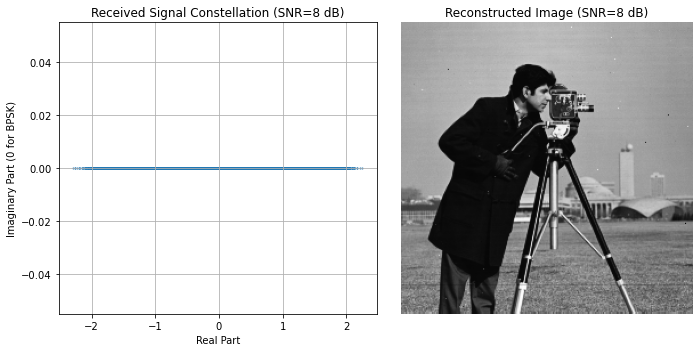

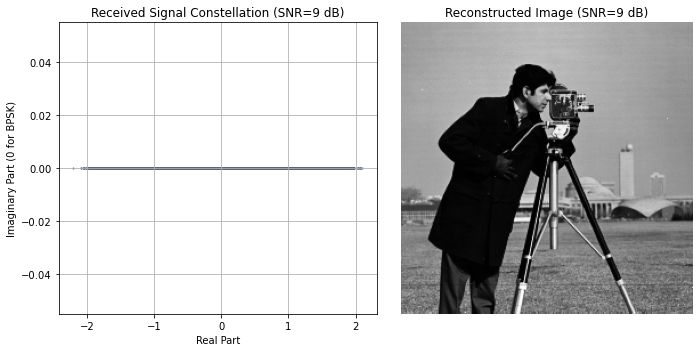

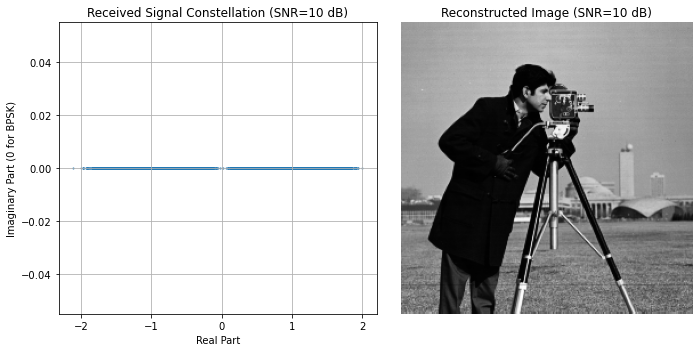

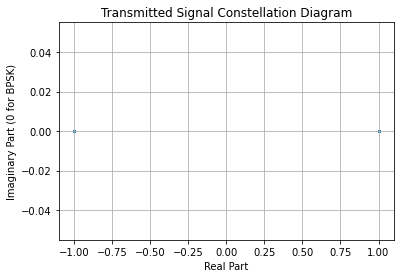

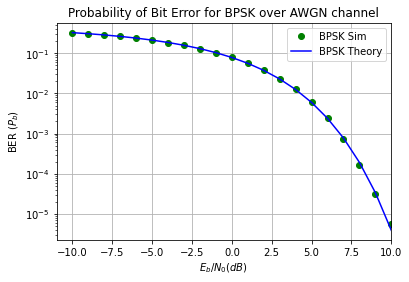

In [7]:
import numpy as np
import imageio
from scipy.special import erfc
import matplotlib.pyplot as plt
from skimage.transform import resize

print("Name: Dhyan Navneeth V")
print("Roll No: 25")
print("Dept: ECE")

# Manually specify the image path
image_path = "G:\My Drive\KTU\S6\Comm LAB\cameraman.png"  # Change this to your actual image path

# Read the image
img = imageio.imread(image_path)

# Convert to grayscale if not already
if len(img.shape) == 3:  # If RGB, convert to grayscale
    img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

# Resize to 256x256 if necessary
if img.shape != (256, 256):
    img = resize(img, (256, 256), anti_aliasing=True)
    img = (img * 255).astype(np.uint8)  # Convert back to uint8

# Display the image
plt.imshow(img, cmap='gray')
plt.axis('off')  # Hide axes
plt.title("Original Image")
plt.show()

# Convert the array values (0-255) into 8-bit binary representation
binary_image = [list(np.binary_repr(i, width=8)) for i in img.flatten()]
binary_image = np.array(binary_image).reshape(-1)

# Convert binary 0 to -1 and 1 to 1 (BPSK Modulation)
transmitted_signal = np.array([1 if i == '1' else -1 for i in binary_image])

# Initialize BER list
BER_sim = []

# Loop through SNR values
for s in range(-10, 11, 1):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjusted figure size

    snr_db = s
    snr = 10 ** (snr_db / 10)

    # Generate noise
    noise = np.random.normal(0, np.sqrt(1/(2*snr)), transmitted_signal.shape) 

    # Received signal
    received_signal = transmitted_signal + noise

    # **Scatter Plot (Constellation Diagram)**
    ax1 = axes[0]
    ax1.scatter(received_signal, np.zeros_like(received_signal), s=1)
    ax1.set_xlabel('Real Part')
    ax1.set_ylabel('Imaginary Part (0 for BPSK)')
    ax1.set_title(f'Received Signal Constellation (SNR={s} dB)')
    ax1.grid(True)

    # Decode the received signal
    ml_decoded_signal = np.array([1 if i > 0 else -1 for i in received_signal])
    binary_conversion = np.array(['1' if i == 1 else '0' for i in ml_decoded_signal])
    received_bits = [''.join(binary_conversion[i:i+8]) for i in range(0, len(binary_conversion), 8)]
    received_image = np.array([int(i, 2) for i in received_bits]).reshape(256, 256).astype(np.uint8)

    # **Reconstructed Image**
    ax2 = axes[1]
    ax2.imshow(received_image, cmap='gray')
    ax2.set_title(f'Reconstructed Image (SNR={s} dB)')
    ax2.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

    # **Calculate BER**
    error = np.sum(ml_decoded_signal != transmitted_signal)
    BER_sim.append(error / len(ml_decoded_signal))

# Plot the transmitted signal constellation
plt.scatter(transmitted_signal, np.zeros_like(transmitted_signal), s=1)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part (0 for BPSK)')
plt.title('Transmitted Signal Constellation Diagram')
plt.grid(True)
plt.show()

# Calculate BER theoretically
snr_db = np.arange(-10, 11, 1)
BER_theory = 0.5 * erfc(np.sqrt(10**(snr_db / 10)))

# Plot BER vs SNR
fig, ax = plt.subplots()
ax.semilogy(snr_db, BER_sim, 'go', linestyle='', label='BPSK Sim')
ax.semilogy(snr_db, BER_theory, 'b-', label='BPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$')
ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.legend()
ax.set_xlim(-11, 10)
ax.grid(True)
plt.show()
